In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
#normalize
x_train, x_test = x_train / 255, x_test / 255

In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(10, activation = "softmax")
])

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer = SGD(),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
history = model.fit(x_train, y_train, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7040 - loss: 1.0822 - val_accuracy: 0.9087 - val_loss: 0.3241
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9103 - loss: 0.3147 - val_accuracy: 0.9282 - val_loss: 0.2535
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9288 - loss: 0.2471 - val_accuracy: 0.9386 - val_loss: 0.2135
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9376 - loss: 0.2141 - val_accuracy: 0.9453 - val_loss: 0.1928
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9483 - loss: 0.1815 - val_accuracy: 0.9507 - val_loss: 0.1685
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9534 - loss: 0.1650 - val_accuracy: 0.9543 - val_loss: 0.1536
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9586 - loss: 0.1460 - val_accuracy: 0.9584 - val_loss: 0.1468
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9613 - loss: 0.1348 -

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss is {test_loss}")
print(f"Test accuracy is {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9588 - loss: 0.1329
Test loss is 0.11453751474618912
Test accuracy is 0.965399980545044


In [9]:
history.history??

In [10]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

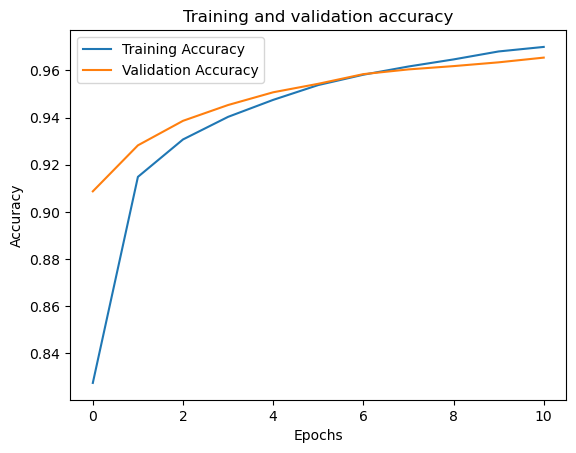

In [11]:
plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

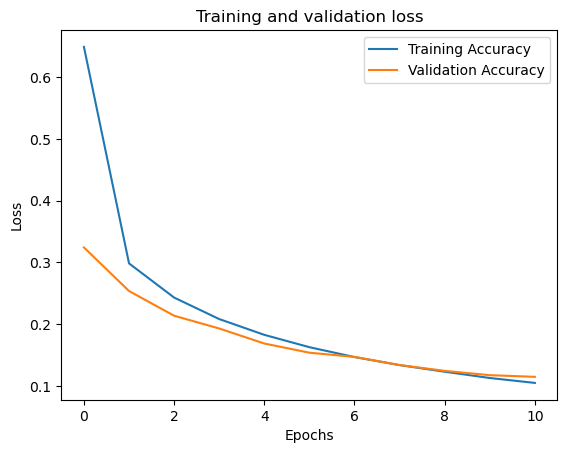

In [12]:
plt.plot(history.history['loss'], label = "Training Accuracy")
plt.plot(history.history['val_loss'], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


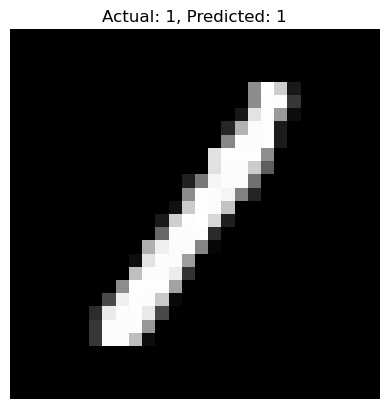

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


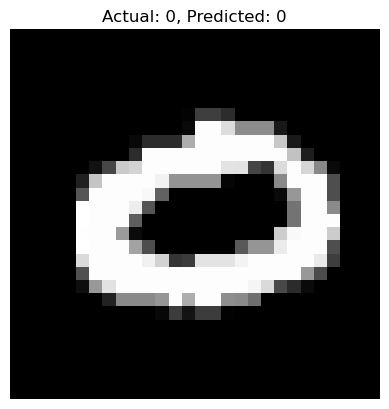

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


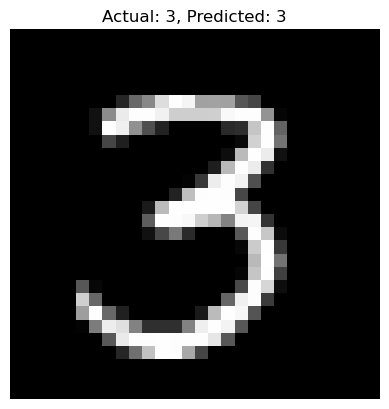

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


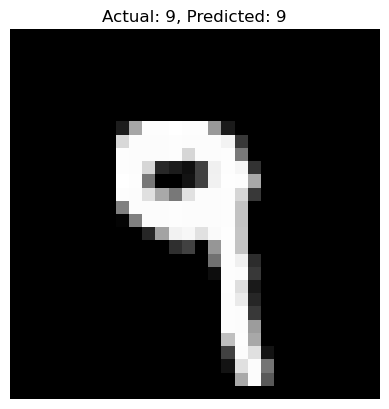

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


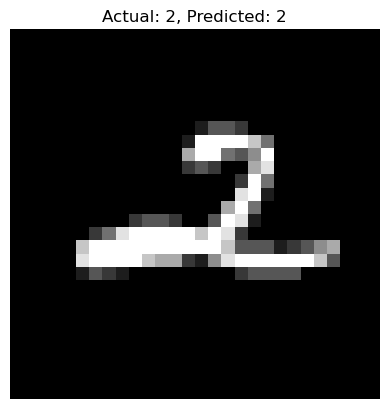

In [14]:
#optional step

num_images = 5
rand_choices = np.random.choice(x_test.shape[0], num_images, replace = False)

for i, index in enumerate(rand_choices):
    img = x_test[index]
    label = y_test[index]

    pred = model.predict(np.expand_dims(img, axis = 0))
    pred_label = np.argmax(pred)

    plt.imshow(img, cmap = "gray")
    plt.title(f"Actual : {label}, Predicted: {pred_label}")
    plt.axis("off")
    plt.show()